In [2]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 
import os
import time

In [3]:
working_directory = os.path.realpath(os.path.join(os.getcwd(), os.path.dirname('__file__')))[:-8] + 'data\\'
print(working_directory)
start = time.time()
auctions = pd.read_csv(working_directory + 'auctions.csv.gzip', compression='gzip')
clicks = pd.read_csv(working_directory + 'clicks.csv.gzip', compression='gzip')
events = pd.read_csv(working_directory + 'events.csv.gzip', compression='gzip')
installs = pd.read_csv(working_directory + 'installs.csv.gzip', compression='gzip')
target_competencia = pd.read_csv(working_directory + 'target_competencia.csv')
print('se tardo {0} segundos en cargar dataframes'.format(time.time()-start))


C:\Users\Ariel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (12,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


se tardo 197.41880702972412 segundos en cargar dataframes


In [4]:
print('''
largos de los df:
                auctions: {0}
                clicks: {1}
                events: {2}
                installs: {3}'''.format(len(auctions), len(clicks), len(events), len(installs))
     )


largos de los df:
                auctions: 19571319
                clicks: 26351
                events: 2494423
                installs: 3412


## Auctions 

In [10]:
auctions.head()


,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
0,NaN,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,NaN,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,NaN,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,NaN,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,NaN,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [5]:
auctions.auction_type_id.unique() # no tiene nada

array([nan])

In [14]:
auctions.country.value_counts() #hay un solo valor para country

6333597102633388268    19571319
Name: country, dtype: int64

In [ ]:
auctions.drop('auction_type_id', axis=1, inplace=True)
# auctions.drop('country', axis=1, inplace=True) conviene tirar el country?

In [55]:
print('valores unicos de platform:', auctions.platform.unique())
print('valores unicos de ref_type_id:', auctions.ref_type_id.unique())
print('valores unicos de source_id:', auctions.source_id.unique())

valores unicos de platform: [1 2]
valores unicos de ref_type_id: [1 7]
valores unicos de source_id: [0 5 6 1 2]


In [76]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 6 columns):
country        int64
date           object
device_id      int64
platform       int8
ref_type_id    int8
source_id      int8
dtypes: int64(2), int8(3), object(1)
memory usage: 503.9+ MB


In [64]:
#Los 5 dispositivos que mas participaron de subastas
top5=auctions.device_id.value_counts()[:5] 
top5=(list(top5.index)) #Me intersa recuperar el indice de la tabla del paso anterior
print(top5)

[633139769114048761, 7202276635029175071, 7298861376107043945, 6302840482782120473, 5376802567578262905]


In [75]:
#Filtro las subastas de estos 5 dispositivos
auctions_top5= auctions.loc[auctions.device_id.isin(top5),:] 
auctions_top5.head()

,auction_type_id,country,date,device_id,platform,ref_type_id,source_id
12655,NaN,6333597102633388268,2019-03-12 03:02:37.264242,7298861376107043945,1,1,0
12857,NaN,6333597102633388268,2019-03-12 03:40:56.976592,7298861376107043945,1,1,0
12890,NaN,6333597102633388268,2019-03-12 03:41:40.257843,7298861376107043945,1,1,0
12940,NaN,6333597102633388268,2019-03-12 03:43:01.529164,7298861376107043945,1,1,0
13109,NaN,6333597102633388268,2019-03-12 03:49:58.483260,633139769114048761,1,1,0


In [114]:
pd.to_datetime(auctions_top5['date'])
auctions_top5.dtypes

auction_type_id           float64
country                     int64
date               datetime64[ns]
device_id                   int64
platform                    int64
ref_type_id                 int64
source_id                   int64
dtype: object

## Clicks

In [75]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null int64
action_id          0 non-null float64
source_id          26351 non-null int64
created            26351 non-null object
country_code       26351 non-null int64
latitude           26351 non-null float64
longitude          26351 non-null float64
wifi_connection    26351 non-null bool
carrier_id         26340 non-null float64
trans_id           26351 non-null object
os_minor           26339 non-null float64
agent_device       3243 non-null float64
os_major           26339 non-null float64
specs_brand        26351 non-null int64
brand              6235 non-null float64
timeToClick        22977 non-null float64
touchX             23011 non-null float64
touchY             23011 non-null float64
ref_type           26351 non-null int64
ref_hash           26351 non-null int64
dtypes: bool(1), float64(11), int64(6), object(2)
memory usage: 3.8+ MB


In [72]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525


In [138]:
clicks['created']=pd.to_datetime(clicks['created'],  format = '%Y-%m-%d %H:%M:%S.%f')
print(clicks.dtypes)

advertiser_id               int64
action_id                 float64
source_id                   int64
created            datetime64[ns]
country_code                int64
latitude                  float64
longitude                 float64
wifi_connection              bool
carrier_id                float64
trans_id                   object
os_minor                  float64
agent_device              float64
os_major                  float64
specs_brand                 int64
brand                     float64
timeToClick               float64
touchX                    float64
touchY                    float64
ref_type                    int64
ref_hash                    int64
dtype: object


<IPython.core.display.Javascript object>


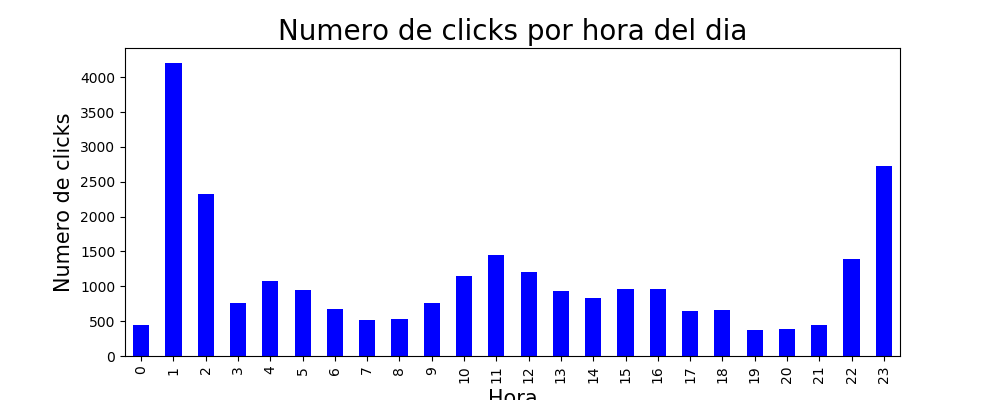

In [148]:

fig, ax = plt.subplots()
clicks['created'].dt.hour.value_counts().sort_index().plot(kind='bar',figsize=(10,4), color = 'blue');
plt.title("Numero de clicks por hora del dia",size=20)
#plt.suptitle(" ")
ax.set_ylabel('Numero de clicks',size=15);
ax.set_xlabel('Hora',size=15);

plt.show()

## Events

In [80]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
0,2019-03-05 00:09:36.966,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
1,2019-03-05 00:09:38.920,1,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
2,2019-03-05 00:09:26.195,0,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,NaN,Cable/DSL,7858558567428669000,4.077062e+17
3,2019-03-05 00:09:31.107,2,1891515180541284343,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,NaN,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,NaN,Cable/DSL,6324037615828123965,4.077062e+17
4,2019-03-09 21:00:36.585,3,1891515180541284343,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,NaN,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,NaN,Cable/DSL,2894495631302821483,3.301378e+18


In [21]:
events.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [30]:
events.ref_hash.unique().size

196049

## Installs

In [81]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


In [31]:
installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


In [82]:
target_competencia.head()

,index,ref_hash,obj_Sc,obj_St
0,0,1.378981e+17,0,0
1,1,1.508792e+17,0,0
2,2,1.514131e+17,0,0
3,3,1.516466e+17,0,0
4,4,2.007704e+17,0,0
